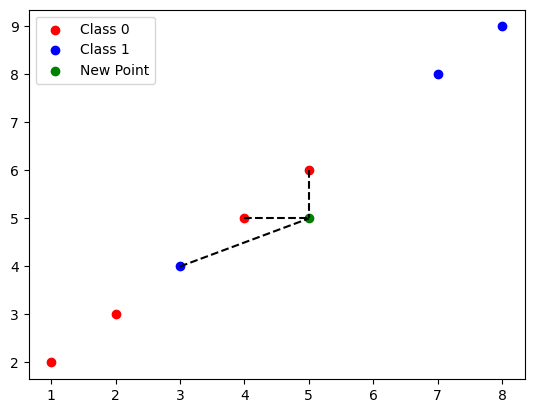

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

# Sample data - replace with your own dataset
X = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [2, 3], [8, 9], [4, 5]])  # Example features
y = np.array([0, 1, 0, 1, 0, 1, 0])  # Example labels (0 and 1 for two classes)

# New data point
new_point = np.array([[5, 5]])

# Plotting the existing data points
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')

# Plotting the new data point
plt.scatter(new_point[:, 0], new_point[:, 1], color='green', label='New Point')

# Finding the nearest neighbors
nbrs = NearestNeighbors(n_neighbors=3, algorithm='ball_tree').fit(X)
distances, indices = nbrs.kneighbors(new_point)

# Highlighting the nearest neighbors
for i in indices[0]:
    plt.plot([X[i][0], new_point[0][0]], [X[i][1], new_point[0][1]], 'k--')

plt.legend()
plt.savefig('knn.jpeg')
plt.show()


In [3]:
import numpy as np
from collections import Counter

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        # Compute distances between x and all examples in the training set
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        # Sort by distance and return indices of the first k neighbors
        k_indices = np.argsort(distances)[:self.k]
        # Extract the labels of the k nearest neighbor training samples
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        # Majority vote, most common class label among the k nearest neighbors
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

# Example of using our KNN
if __name__ == "__main__":
    from sklearn.datasets import load_iris
    from sklearn.model_selection import train_test_split

    # Load the Iris dataset
    iris = load_iris()
    X, y = iris.data, iris.target

    # Split dataset into training and testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

    # Create and train the KNN classifier
    clf = KNN(k=3)
    clf.fit(X_train, y_train)

    # Predictions
    predictions = clf.predict(X_test)

    # Evaluate accuracy
    accuracy = np.mean(predictions == y_test)
    print(f"KNN classification accuracy: {accuracy}")


KNN classification accuracy: 0.9666666666666667
